<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg'); 
            background-size: cover; 
            background-position: center; 
            padding: 30px; 
            text-align: center; 
            border-radius: 8px;">
    <h1 style="color: white; 
               font-size: 28px; 
               font-weight: bold; 
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8), 
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        PROYECTO: MODELO DE RIESGO
    </h1>
</div>

- Mar√≠a Jos√© Castillo Silva
- Juan David Bocanegra Vargas
- Luisa Fernanda Guevara Usuariaga

In [1]:
# Permite ajustar la anchura de la parte √∫til de la libreta (reduce los m√°rgenes) y omitir warnings
import warnings
warnings.filterwarnings("ignore")

# Configuraci√≥n de matplotlib para evitar warnings de fuentes
import matplotlib
matplotlib.rcParams['font.family'] = 'DejaVu Sans'
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

from IPython.display import HTML
display(HTML("<style>.container{ width:98% }</style>"))

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg'); 
            background-size: cover; 
            background-position: center; 
            padding: 30px; 
            text-align: left; 
            border-radius: 8px;">
    <h2 style="color: white; 
               font-size: 28px; 
               font-weight: bold; 
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8), 
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        1. Problema a Analizar
    </h2>
</div>

### ¬øCu√°l es la probabilidad de riesgo de default asociada a cada cliente, dadas sus diferentes caracter√≠sticas?.

La principal fuente de datos es Datacredito Experian, quienes env√≠an informaci√≥n de los clientes actuales de la Entidad, incluyendo las siguientes variables: ‚ÄúAcierta Advance‚Äù, score de cr√©dito del sector financiero, saldos, estados de productos crediticios y tambi√©n informaci√≥n demografica como edad, sexo, entre otras.

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg'); 
            background-size: cover; 
            background-position: center; 
            padding: 30px; 
            text-align: left; 
            border-radius: 8px;">
    <h2 style="color: white; 
               font-size: 28px; 
               font-weight: bold; 
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8), 
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        2. Impacto del Problema
    </h2>
</div>

Actualmente en las √°reas de riesgo de cr√©dito en el sector bancario, se definen constantemente pol√≠ticas que permiten soportar la toma de decisiones en la originaci√≥n  de productos, que en la medida de lo posible, est√©n enmarcadas en la agilidad y precisi√≥n de la respuesta a clientes, y vayan en l√≠nea con el apetito financiero propuesto por la Junta Directiva.

<div style="background-image: url('https://i.pinimg.com/1200x/45/3a/06/453a06bdc2b2d27d8329857061537124.jpg'); 
            background-size: cover; 
            background-position: center; 
            padding: 30px; 
            text-align: left; 
            border-radius: 8px;">
    <h2 style="color: white; 
               font-size: 28px; 
               font-weight: bold; 
               text-shadow: 2px 2px 4px rgba(0,0,0,0.8), 
                            -1px -1px 2px rgba(0,0,0,0.8);
               margin: 0;
               font-family: 'Arial', sans-serif;">
        3. EDA
    </h2>
</div>

## Instalaci√≥n de Librerias

In [2]:
#!pip install eli5
#!pip install pandas
#!pip install numpy
#!pip install seaborn
#!pip install yellowbrick
#!pip install xgboost
#!pip install shap
#!pip install matplotlib
#!pip install scikit-learn
#!pip install imbalanced-learn

## Cargar Librer√≠as

In [3]:
# %pip install -U scikit-learn==1.5.2 imbalanced-learn==0.12.3 yellowbrick==1.5

In [40]:
# ===============================
# N√∫cleo cient√≠fico / utilidades
# ===============================
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Modelado y validaci√≥n (scikit-learn)
# ===============================
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, roc_curve, precision_recall_curve,
    confusion_matrix
)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# ===============================
# Desbalanceo de clases (imbalanced-learn)
# ===============================
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ===============================
# Gradient Boosting (XGBoost)
# ===============================
from xgboost import XGBClassifier

# ===============================
# Estad√≠stica (SciPy y Statsmodels)
# ===============================
from scipy import stats
from scipy.stats import shapiro, normaltest, ttest_ind, mannwhitneyu
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF

# ===============================
# Otros apoyos
# ===============================
from collections import Counter

# ===============================
# Opcionales de interpretaci√≥n/visual
# ===============================
import shap
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, ClassificationReport
import eli5

# ===============================
# Estilo de gr√°ficos
# ===============================
plt.style.use("ggplot")


## Importar Datos

In [5]:
datos = pd.read_csv('data/base_modelo_40k.csv', sep=',')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   40000 non-null  int64  
 1   CLIENTE_MORA         40000 non-null  int64  
 2   SEXO                 40000 non-null  object 
 3   EDAD                 40000 non-null  int64  
 4   INGRESO              40000 non-null  float64
 5   SCORE_DATACREDITO    40000 non-null  int64  
 6   CRED_REESTRUCTURADO  40000 non-null  int64  
 7   ANT_SF               40000 non-null  float64
 8   SALDO_SF             40000 non-null  float64
 9   TIENE_HIPOTECA       40000 non-null  int64  
 10  ULTIMAPERTURA        40000 non-null  int64  
 11  SALDO_FIJO           40000 non-null  float64
 12  SALDO_ROT            40000 non-null  float64
 13  ESTADO_MORA_FIN      40000 non-null  float64
 14  ESTADO_MORA_REAL     40000 non-null  float64
dtypes: float64(7), int64(7), object(1)
m

In [6]:
datos.head()

ID  CLIENTE_MORA SEXO  EDAD    INGRESO  SCORE_DATACREDITO  \
0  245411             0    F    51   5.373539                675   
1  278521             0    M    32  20.009334                812   
2   58481             0    M    58   5.537541                812   
3  183771             0    F    40   5.838028                840   
4  310611             0    M    63   2.192562                625   

   CRED_REESTRUCTURADO  ANT_SF    SALDO_SF  TIENE_HIPOTECA  ULTIMAPERTURA  \
0                    0    6.83  133.124423               0             35   
1                    0    7.83  282.607212               0             18   
2                    0    6.17   10.650218               0              3   
3                    0    7.00   87.428428               1              7   
4                    0    0.00    0.000000               0             -1   

   SALDO_FIJO  SALDO_ROT  ESTADO_MORA_FIN  ESTADO_MORA_REAL  
0   86.191899  68.093088              0.0               0.0  
1   68.242921  19.081655              0.0               0.0  
2   26.764786  44.264709              0.0               0.0  
3   32.291321  29.558226              0.0               0.0  
4    0.000000   0.000000              0.0               0.0

In [7]:
print(datos.shape)

(40000, 15)


* Inicialmente se contemplaron 40 variables en estudio, mixtas entre categ√≥ricas y num√©ricas

## Limpieza y Armonizaci√≥n

In [8]:
datos['SEXO']=datos['SEXO'].replace({'M':0,'F':1}).astype('object')
datos['CRED_REESTRUCTURADO']=datos['CRED_REESTRUCTURADO'].astype('object')
datos['TIENE_HIPOTECA']=datos['TIENE_HIPOTECA'].astype('object')
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('object')

In [9]:
### Conteo valores nulos
datos.isnull().sum()

ID                     0
CLIENTE_MORA           0
SEXO                   0
EDAD                   0
INGRESO                0
SCORE_DATACREDITO      0
CRED_REESTRUCTURADO    0
ANT_SF                 0
SALDO_SF               0
TIENE_HIPOTECA         0
ULTIMAPERTURA          0
SALDO_FIJO             0
SALDO_ROT              0
ESTADO_MORA_FIN        0
ESTADO_MORA_REAL       0
dtype: int64

* Por criterio experto, se consideran no necesarias las variables asociadas a la identificaci√≥n del cliente, como el tipo de Id, el n√∫mero de identificaci√≥n y la fecha de evaluaci√≥n; tambi√©n se elimina la variable "Acierta_plus" ya que existe la variable "Advance".

In [10]:
#ELIMINAR COLUMNAS NO NECESARIAS
datos=datos.drop(labels='ID',axis=1)
datos

CLIENTE_MORA SEXO  EDAD    INGRESO  SCORE_DATACREDITO  \
0                0    1    51   5.373539                675   
1                0    0    32  20.009334                812   
2                0    0    58   5.537541                812   
3                0    1    40   5.838028                840   
4                0    0    63   2.192562                625   
...            ...  ...   ...        ...                ...   
39995            0    1    60   5.855639                753   
39996            0    1    57   2.975149                725   
39997            0    0    38   3.473759                753   
39998            1    0    54   7.497859                625   
39999            0    0    56  23.148484                862   

      CRED_REESTRUCTURADO  ANT_SF    SALDO_SF TIENE_HIPOTECA  ULTIMAPERTURA  \
0                       0    6.83  133.124423              0             35   
1                       0    7.83  282.607212              0             18   
2                       0    6.17   10.650218              0              3   
3                       0    7.00   87.428428              1              7   
4                       0    0.00    0.000000              0             -1   
...                   ...     ...         ...            ...            ...   
39995                   0    7.75   46.270552              0              5   
39996                   0    6.08    6.774709              0             56   
39997                   0   12.00    3.549705              0             27   
39998                   0   22.00   52.590679              0              9   
39999                   0    9.42  281.634207              0              7   

       SALDO_FIJO  SALDO_ROT  ESTADO_MORA_FIN  ESTADO_MORA_REAL  
0       86.191899  68.093088              0.0               0.0  
1       68.242921  19.081655              0.0               0.0  
2       26.764786  44.264709              0.0               0.0  
3       32.291321  29.558226              0.0               0.0  
4        0.000000   0.000000              0.0               0.0  
...           ...        ...              ...               ...  
39995   91.765247  58.386919              0.0               0.0  
39996   73.974337  68.846599              0.0               0.0  
39997   51.626281  21.191923              0.0               0.0  
39998   73.950412  79.353979              0.0               0.0  
39999   56.939315  20.071860              0.0               0.0  

[40000 rows x 14 columns]

In [11]:
### Dimensi√≥n base de datos
print(datos.shape)

(40000, 14)


## An√°lisis Exploratorio

In [12]:
def info_frecuencia(df, threshold=0.05):
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Verificar si la columna es categ√≥rica
            df_copy = df.copy()

            # Calcular las proporciones de cada categor√≠a
            value_counts = df_copy[columna].value_counts() / len(df_copy)

            # Imprimir las frecuencias antes de la agrupacion
            print(f"Proporciones de cada categor√≠a antes de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            # Encontrar las categor√≠as que representan menos del threshold
            categorias_a_agrupar = value_counts[value_counts < threshold].index

            # Reemplazar las categor√≠as con "Otros" en la copia
            df_copy[columna] = df_copy[columna].apply(lambda x: "Otros" if x in categorias_a_agrupar else x)

            # Mostrar las proporciones en la copia del DataFrame
            #print(f"Proporciones de cada categor√≠a despu√©s de agrupar 'Otros' en {columna}:\n", df_copy[columna].value_counts() / len(df_copy))

            plt.figure(figsize=(4, 1))
            sns.set_context("paper", font_scale=1)
            sns.catplot(data=df_copy, x=columna, kind="count", palette="ch:.25", height=4, aspect=2)
            plt.title(f'Frecuencias de {columna}')
            plt.tick_params(left=False)
            plt.show()

Proporciones de cada categor√≠a antes de agrupar 'Otros' en SEXO:
 SEXO
0    0.51025
1    0.48975
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

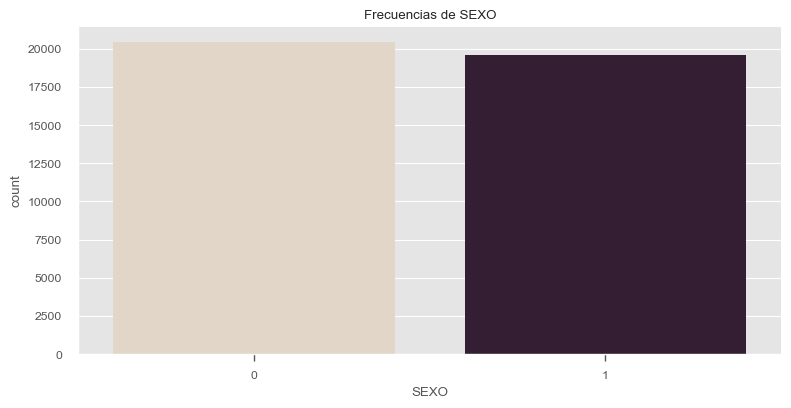

Proporciones de cada categor√≠a antes de agrupar 'Otros' en CRED_REESTRUCTURADO:
 CRED_REESTRUCTURADO
0    0.9932
1    0.0068
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

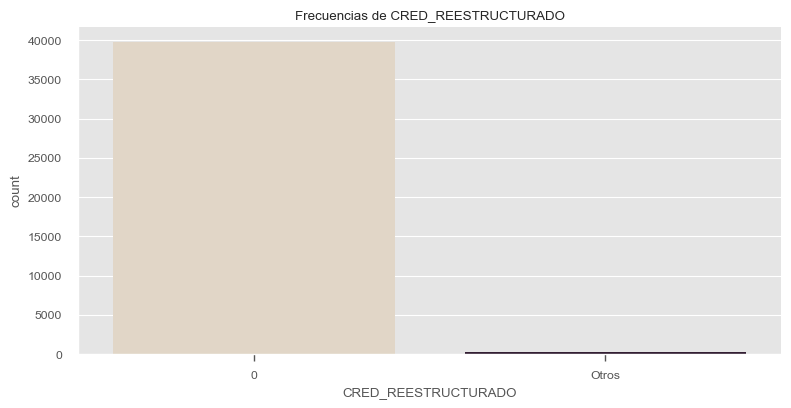

Proporciones de cada categor√≠a antes de agrupar 'Otros' en TIENE_HIPOTECA:
 TIENE_HIPOTECA
0     0.775450
-1    0.133375
1     0.091175
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

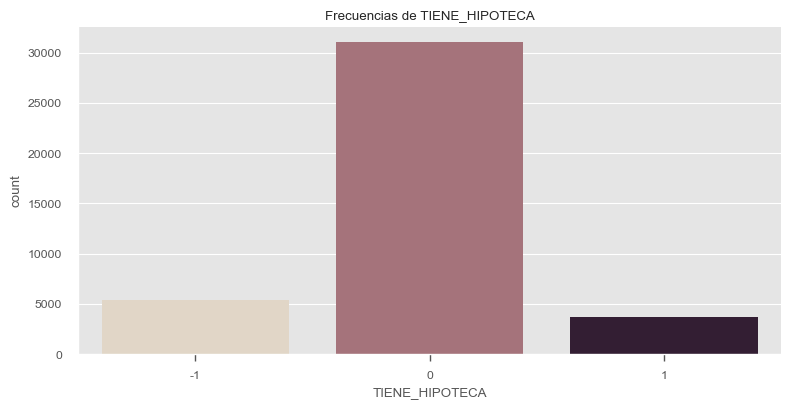

Proporciones de cada categor√≠a antes de agrupar 'Otros' en CLIENTE_MORA:
 CLIENTE_MORA
0    0.921375
1    0.078625
Name: count, dtype: float64


<Figure size 400x100 with 0 Axes>

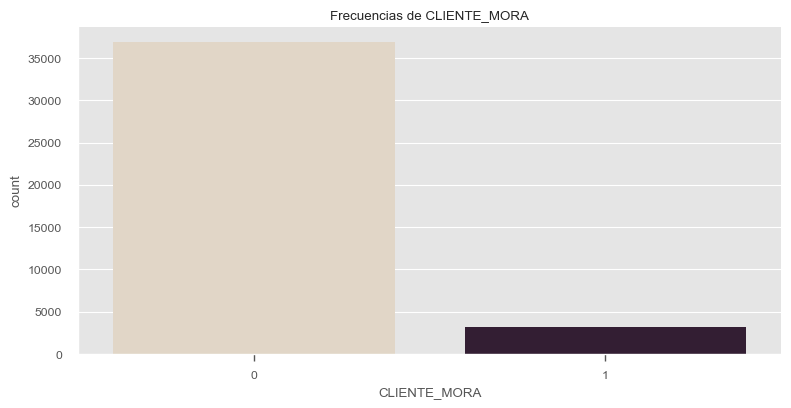

In [13]:
info_frecuencia(datos[[
    'SEXO', 
    'CRED_REESTRUCTURADO', 
    'TIENE_HIPOTECA', 
    'ESTADO_MORA_FIN', 
    'ESTADO_MORA_REAL',
    'CLIENTE_MORA'
]])

Nota: De acuerdo al desbalanceo y poca variabilidad de la variable CRED_REESTRUCTURADO, en donde la categor√≠a 0 tiene m√°s del 99%, se descartar√° ya que la informaci√≥n que aporta no va hacer significativa

* La Variable de inter√©s es la variable llamada CLIENTE_MORA, que es 1 si el cliente tuvo una mora mayor a 90 d√≠as en los doce meses siguientes al desembolso del credito y 0 si ha estado al d√≠a.

* La base con 40.000 clientes, contiene un 7.86% de clientes en mora y un 92.13% de clientes al d√≠a

Text(0.5, 1.0, 'Score Datacredito Clientes al d√≠a y en mora')

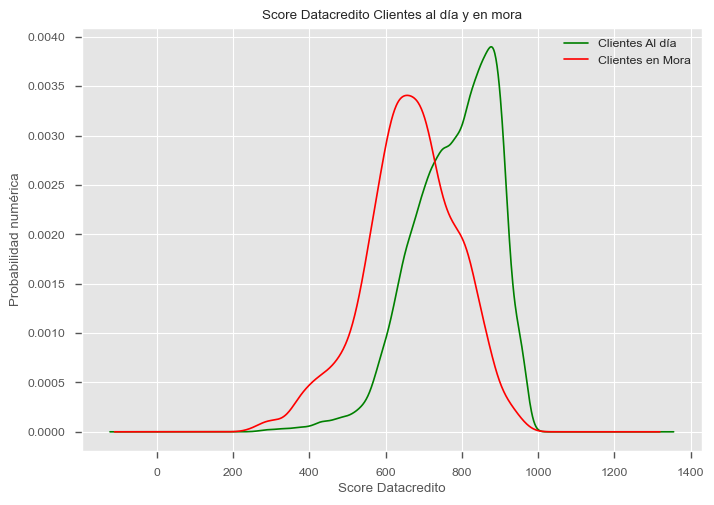

In [14]:
#Separaci√≥n de Bases
datos_0 = datos[datos['CLIENTE_MORA'] == 0]
datos_1 = datos[datos['CLIENTE_MORA'] == 1]

#Funci√≥n de densidad 
datos_0.SCORE_DATACREDITO.plot.density(color='green',label='Clientes Al d√≠a') 
datos_1.SCORE_DATACREDITO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Score Datacredito")
plt.ylabel('Probabilidad num√©rica')
plt.title('Score Datacredito Clientes al d√≠a y en mora')

* Se evidencia que los clientes que han tenido una mora de 90 d√≠as o m√°s en los 12 ultimos meses tienen un Score Advance (c√°lculo por datacredito) menor a los clientes que han estado al d√≠a. Tambi√©n se resalta que, la mayor√≠a de clientes en mora tienen un Score Advance entre 500 a 850, en cambio los clientes que han estado al d√≠a tienen un score adnvance entre 650 a 950.

### Pruebas estad√≠sticas

In [15]:
# Test de normalidad Shapiro-Wilk
print("Prueba Shapiro-Wilk Poblaci√≥n al d√≠a:",shapiro(datos_0['SCORE_DATACREDITO']))
print("Prueba Shapiro-Wilk Poblaci√≥n en mora:",shapiro(datos_1['SCORE_DATACREDITO']))

Prueba Shapiro-Wilk Poblaci√≥n al d√≠a: ShapiroResult(statistic=np.float64(0.9604629152610893), pvalue=np.float64(3.497891665963961e-69))
Prueba Shapiro-Wilk Poblaci√≥n en mora: ShapiroResult(statistic=np.float64(0.9901863098442275), pvalue=np.float64(6.594495942150208e-14))


In [16]:
# Diferencia de medias
def dif_medias (df1, df2, alfa):
    stat, p = ttest_ind(df1,df2, equal_var = False)
    print("Statistic=%.3f, p=%.3f" % (stat,p))

dif_medias (datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], 0.05)

Statistic=51.261, p=0.000


In [17]:
# Prueba no parametrcia Mann-Whitney para comparar la variable ADVANCE en los dos grupos
stat, p = mannwhitneyu(datos_0['SCORE_DATACREDITO'], datos_1['SCORE_DATACREDITO'], alternative='two-sided')

print("Mann-Whitney U Test")
print(f"Estad√≠stico U = {stat:.3f}, p-valor = {p:.3e}")

# Interpretaci√≥n r√°pida
alpha = 0.05
if p < alpha:
    print("üëâ Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.")
else:
    print("üëâ No se rechaza H0: No hay evidencia de diferencia significativa entre los grupos.")

Mann-Whitney U Test
Estad√≠stico U = 88669802.000, p-valor = 0.000e+00
üëâ Se rechaza H0: Las distribuciones de ADVANCE en los dos grupos son diferentes.


In [18]:
datos.head()

CLIENTE_MORA SEXO  EDAD    INGRESO  SCORE_DATACREDITO CRED_REESTRUCTURADO  \
0            0    1    51   5.373539                675                   0   
1            0    0    32  20.009334                812                   0   
2            0    0    58   5.537541                812                   0   
3            0    1    40   5.838028                840                   0   
4            0    0    63   2.192562                625                   0   

   ANT_SF    SALDO_SF TIENE_HIPOTECA  ULTIMAPERTURA  SALDO_FIJO  SALDO_ROT  \
0    6.83  133.124423              0             35   86.191899  68.093088   
1    7.83  282.607212              0             18   68.242921  19.081655   
2    6.17   10.650218              0              3   26.764786  44.264709   
3    7.00   87.428428              1              7   32.291321  29.558226   
4    0.00    0.000000              0             -1    0.000000   0.000000   

   ESTADO_MORA_FIN  ESTADO_MORA_REAL  
0              0.0               0.0  
1              0.0               0.0  
2              0.0               0.0  
3              0.0               0.0  
4              0.0               0.0

In [19]:
# Definir las variables num√©ricas a analizar (excluyendo la variable objetivo CLIENTE_MORA)
variables_numericas = [
    'INGRESO', 'SCORE_DATACREDITO', 
    'ANT_SF', 'SALDO_SF', 'ULTIMAPERTURA', 
    'SALDO_FIJO', 'SALDO_ROT', 'ESTADO_MORA_FIN', 'ESTADO_MORA_REAL'
]

# Crear listas para almacenar resultados
resultados = []

# Realizar la prueba Mann-Whitney U para cada variable
for variable in variables_numericas:

    
    # Realizar prueba Mann-Whitney U
    stat, p_value = mannwhitneyu(datos_0[variable], datos_1[variable], alternative='two-sided')
    
    # Determinar significancia
    alpha = 0.05
    significativo = "S√≠" if p_value < alpha else "No"
    
    # Agregar resultados a la lista
    resultados.append({
        'Variable': variable,
        'Estad√≠stico_U': round(stat, 3),
        'P_valor': f"{p_value:.3e}",
        'Significativo_(Œ±=0.05)': significativo
    })

# Crear DataFrame con los resultados
df_pruebas_mann_whitney = pd.DataFrame(resultados)

# Mostrar el DataFrame
print("=" * 120)
print("PRUEBA MANN-WHITNEY U PARA TODAS LAS VARIABLES NUM√âRICAS")
print("=" * 120)
print("\nComparaci√≥n entre Clientes al D√≠a (Grupo 0) vs Clientes en Mora (Grupo 1)\n")
display(df_pruebas_mann_whitney)

# Resumen de significancia
n_significativas = df_pruebas_mann_whitney[df_pruebas_mann_whitney['Significativo_(Œ±=0.05)'] == 'S√≠'].shape[0]
print(f"\nResumen: {n_significativas} de {len(variables_numericas)} variables muestran diferencias estad√≠sticamente significativas entre grupos.")


PRUEBA MANN-WHITNEY U PARA TODAS LAS VARIABLES NUM√âRICAS

Comparaci√≥n entre Clientes al D√≠a (Grupo 0) vs Clientes en Mora (Grupo 1)



Variable  Estad√≠stico_U     P_valor Significativo_(Œ±=0.05)
0            INGRESO     64975804.0   1.377e-29                     S√≠
1  SCORE_DATACREDITO     88669802.0   0.000e+00                     S√≠
2             ANT_SF     66704326.5   5.050e-45                     S√≠
3           SALDO_SF     57712903.0   6.972e-01                     No
4      ULTIMAPERTURA     62630872.0   4.660e-14                     S√≠
5         SALDO_FIJO     50331621.0   4.710e-35                     S√≠
6          SALDO_ROT     47394860.5   2.950e-65                     S√≠
7    ESTADO_MORA_FIN     43499373.5  1.066e-195                     S√≠
8   ESTADO_MORA_REAL     52340801.0   4.250e-67                     S√≠


Resumen: 8 de 9 variables muestran diferencias estad√≠sticamente significativas entre grupos.


Text(0.5, 1.0, 'SALDO_SF Clientes al d√≠a y en mora')

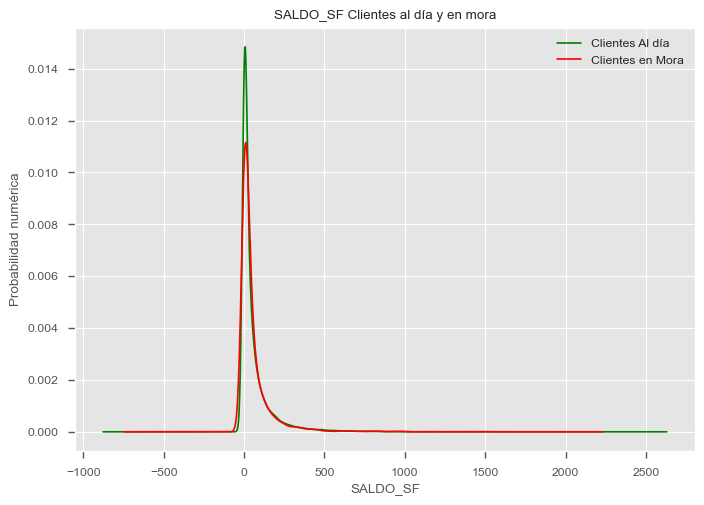

In [20]:
#Funci√≥n de densidad 
datos_0.SALDO_SF.plot.density(color='green',label='Clientes Al d√≠a') 
datos_1.SALDO_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("SALDO_SF")
plt.ylabel('Probabilidad num√©rica')
plt.title('SALDO_SF Clientes al d√≠a y en mora')

* Existe evidencia estad√≠sticamente significativa para afirmar que las medias de la variable ADVANCE en los dos grupos comparados (datos_0 y datos_1) son diferentes, es decir que la variables SCORE_DATACREDITO y las dem√°s variables num√©ricas excepto SALDO_SF son altamente discriminante entre ambos grupos con una significancia de 0.05.
* SALDO_SF estad√≠sticamente no es discriminante entre los grupos, y este an√°lisis se tendra en cuenta en los dem√°s an√°lisi y en los modelos.

Text(0.5, 1.0, 'Antig√ºedad Financiera de Clientes al d√≠a y en mora')

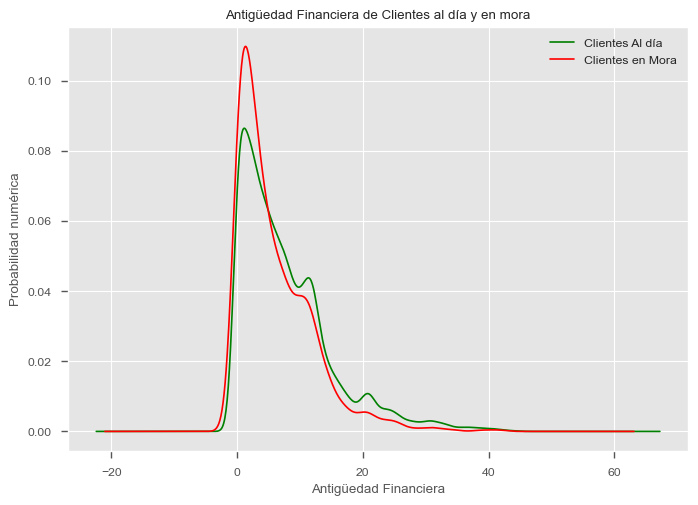

In [21]:
datos_0.ANT_SF.plot.density(color='green',label='Clientes Al d√≠a') 
datos_1.ANT_SF.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Antig√ºedad Financiera")
plt.ylabel('Probabilidad num√©rica')
plt.title('Antig√ºedad Financiera de Clientes al d√≠a y en mora')

* Se evidencia como lo clientes que estan al d√≠a tienden  a tener mayor antiguedad en el sector financiero a comparaci√≥n de los cliente en mora.

In [22]:
# prueba K-S
stats.ks_2samp(datos_0['ANT_SF'], datos_1['ANT_SF'])    

KstestResult(statistic=np.float64(0.11398107868696111), pvalue=np.float64(2.9720346467054806e-33), statistic_location=np.float64(4.83), statistic_sign=np.int8(-1))

üëâ Los clientes al d√≠a tienden a tener una mayor antig√ºedad en el sistema financiero que los clientes en mora.

Text(0.5, 1.0, 'Edad Clientes al d√≠a y en mora')

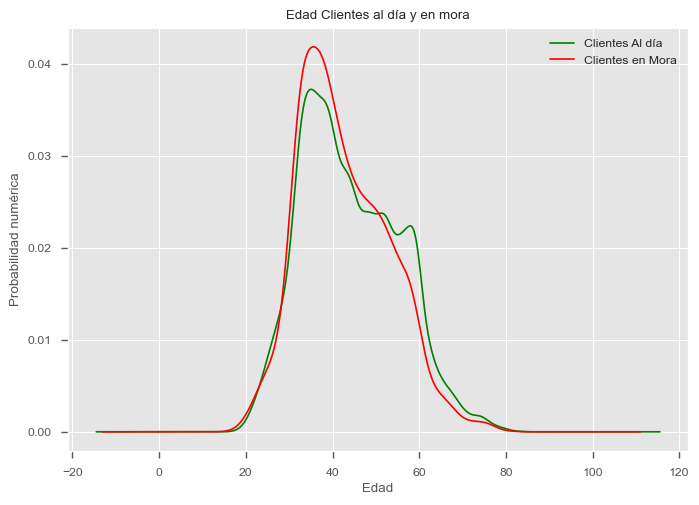

In [23]:
datos_0.EDAD.plot.density(color='green',label='Clientes Al d√≠a') 
datos_1.EDAD.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Edad")
plt.ylabel('Probabilidad num√©rica')
plt.title('Edad Clientes al d√≠a y en mora')

* Los clientes en mora tienden a concentrarse en edades entre los 30 a los 40 a√±os, en cambio los clientes al d√≠a tienden a ser de mayor edad.

In [24]:
pd.crosstab(datos['SEXO'], datos['CLIENTE_MORA'], normalize='index')*100

CLIENTE_MORA          0         1
SEXO                             
0             91.675649  8.324351
1             92.618683  7.381317

* Se evidencia que las mujeres pagan mejor que los hombres, dado que el porcentaje de incumplimiento de las mujeres es 6.7% en cambio de los hombres es de 7.5%.

Text(0.5, 1.0, 'Ingresos de Clientes al d√≠a y en mora')

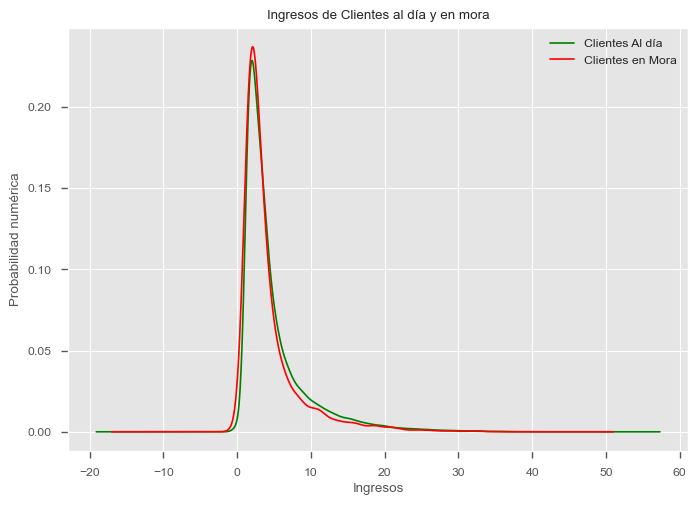

In [25]:
datos_0.INGRESO.plot.density(color='green',label='Clientes Al d√≠a') 
datos_1.INGRESO.plot.density(color='red',label='Clientes en Mora')
plt.legend()
plt.xlabel("Ingresos")
plt.ylabel('Probabilidad num√©rica')
plt.title('Ingresos de Clientes al d√≠a y en mora')

* Se evidencia que no existen diferencias de ingreso respecto al incumplimiento de pago de los clientes, aunque estad√≠sticamente si existe diferencia entre los ingresos de los grupos con un p-valor de 1.377e-29. Esto se tendra en cuenta para los an√°lisis posteriores.

### Correlaci√≥n

In [26]:
# Matriz de correlaci√≥n compacta con encabezados verticales sin superposici√≥n
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr().round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding peque√±os en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos espec√≠ficos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo peque√±o, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente peque√±a
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

In [27]:
# Matriz de correlaci√≥n compacta con encabezados verticales sin superposici√≥n
datos['CLIENTE_MORA']=datos['CLIENTE_MORA'].astype('int64')
corr = datos.select_dtypes(include='number').corr('spearman').round(2)

display(
    corr.style
        .format("{:.2f}")
        .background_gradient(cmap="BrBG")
        # fuente y padding peque√±os en todo
        .set_properties(**{"font-size":"8pt", "padding":"2px"})
        # estilos espec√≠ficos de encabezados
        .set_table_styles([
            # columnas: vertical, ancho fijo peque√±o, sin quiebre ni solape
            {"selector":"th.col_heading",
             "props":[
                 ("writing-mode","vertical-rl"),
                 ("text-orientation","mixed"),
                 ("width","24px"), ("min-width","24px"), ("max-width","24px"),
                 ("height","140px"),
                 ("white-space","nowrap"),
                 ("overflow","hidden"),
                 ("text-overflow","clip"),
                 ("font-size","7pt"),
                 ("padding","6px 2px")
             ]},
            # filas: fuente peque√±a
            {"selector":"th.row_heading",
             "props":[("font-size","7pt"), ("white-space","nowrap")]}
        ])
)

### Eliminaci√≥n de variables VIF

In [28]:
# 1) Solo num√©ricas y limpieza m√≠nima
num = datos.select_dtypes(include='number').copy()
num = num.dropna(axis=1, how='all')                 # quita columnas totalmente vac√≠as
num = num.loc[:, num.nunique()>1]                   # quita columnas con varianza 0
num = num.fillna(num.median(numeric_only=True))     # imputaci√≥n simple (si hay NA)

# 2) Matriz para VIF (no necesita estandarizar)
X = sm.add_constant(num, has_constant='add')

# 3) Calcular VIF (omitimos la constante en el resultado)
vif_vals = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vifs = (pd.DataFrame({'Variable': num.columns, 'VIF': vif_vals})
          .replace([np.inf, -np.inf], np.nan)
          .sort_values('VIF', ascending=False)
          .reset_index(drop=True))

# 4) Mostrar
display(vifs.style.format({'VIF':'{:.2f}'}))


Seg√∫n el VIF no hay problemas de multicolinealidad, sin embargo:

* Seg√∫n las dos matrices de correlaci√≥n, y las pruebas estad√≠sticas anteriores para el modelado se descartan las variables, SALDO_SF y ESTADO_MORA_REAL.
* SALDO_SF se descarta debido a su alta correlaci√≥n con INGRESO adem√°s que individualmente la variable SALDO_SF recordemos que no discrimina bien la variable objetivo.
* Y ESTADO_MORA_REAL se descarta por su alta correlaci√≥n con ESTADO_MORA_FIN y fue escogida ya que su p-valor de diferencias entre los grupos de la variable objetivo es menor al p-valor de  ESTADO_MORA_FIN.

In [29]:
datos.drop(columns=['SALDO_SF', 'ESTADO_MORA_REAL', 'CRED_REESTRUCTURADO'], inplace=True)

# Pipelines

In [ ]:
# X e y
X = datos.drop(columns='CLIENTE_MORA')
y = datos['CLIENTE_MORA']

# Detecta columnas
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols)
], remainder='drop')

X_pre = preprocess.fit_transform(X)
print(f"Shape original: {X.shape} ‚Üí transformado: {X_pre.shape}")



Shape original: (40000, 10) ‚Üí transformado: (40000, 10)


In [32]:
cat_cols

['SEXO', 'TIENE_HIPOTECA']

In [35]:
datos['TIENE_HIPOTECA'].unique()

array([0, 1, -1], dtype=object)

In [34]:
num_cols

['EDAD',
 'INGRESO',
 'SCORE_DATACREDITO',
 'ANT_SF',
 'ULTIMAPERTURA',
 'SALDO_FIJO',
 'SALDO_ROT',
 'ESTADO_MORA_FIN']

## Partici√≥n Train Test

In [ ]:
from sklearn.model_selection import train_test_split

seed = 2025
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=seed, stratify=y, shuffle=True
)

# asegurar que preprocessing_pipeline exista
try:
    preprocessing_pipeline
except NameError:
    preprocessing_pipeline = preprocess

print(f"Split OK ‚Üí X_train: {X_train.shape}, X_test: {X_test.shape}, seed={seed}")
print("preprocessing_pipeline definido ‚úÖ")


Split OK ‚Üí X_train: (28000, 10), X_test: (12000, 10), seed=2025
preprocessing_pipeline definido ‚úÖ


## Funciones de evaluaci√≥n

In [41]:
def evaluar_modelo(best_model, X_train, y_train, X_test, y_test, nombre="Modelo", pos_label=1):
    """Imprime m√©tricas y devuelve un dict con resultados clave."""
    # Predicciones duras
    pred_train = best_model.predict(X_train)
    pred_test  = best_model.predict(X_test)

    # Probabilidades para AUC y PR-AUC
    if hasattr(best_model, "predict_proba"):
        proba_test = best_model.predict_proba(X_test)[:, 1]
    else:
        proba_test = best_model.decision_function(X_test)

    # M√©tricas
    train_acc    = accuracy_score(y_train, pred_train)
    test_acc     = accuracy_score(y_test,  pred_test)
    train_recall = recall_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_recall  = recall_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    train_prec   = precision_score(y_train, pred_train, pos_label=pos_label, zero_division=0)
    test_prec    = precision_score(y_test,  pred_test,  pos_label=pos_label, zero_division=0)
    roc_test     = roc_auc_score(y_test, proba_test)
    pr_test      = average_precision_score(y_test, proba_test)

    # Reporte
    print(f"=== {nombre} ===")
    print('Train Accuracy  : ', train_acc)
    print('Test  Accuracy  : ', test_acc)
    print('Train Recall    : ', train_recall)
    print('Test  Recall    : ', test_recall)
    print('Train Precision : ', train_prec)
    print('Test  Precision : ', test_prec)
    print('ROC AUC (test)  : ', roc_test)

    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, pred_test))

    print('\nClassification Report:')
    print(classification_report(y_test, pred_test, zero_division=0))

    return {
        "train_acc":    train_acc,
        "test_acc":     test_acc,
        "train_recall": train_recall,
        "test_recall":  test_recall,
        "train_prec":   train_prec,
        "test_prec":    test_prec,
        "roc_auc":      roc_test
    }


# Definicion Hiperpar√°metros y CV

In [59]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

seed = globals().get('seed', 42)

# param_grid = {
#     "model": [DecisionTreeClassifier(random_state=seed)],
#     "model__criterion": ["gini", "entropy"],
#     "model__splitter": ["best", "random"],
#     "model__max_leaf_nodes": [128, 256, 512, 1024],
#     "model__max_depth": list(map(int, np.linspace(4, 16, 32)))
# }

param_grid = {
  "model": [DecisionTreeClassifier(random_state=seed)],
  "model__criterion": ["gini","entropy"],
  "model__splitter": ["best"],
  "model__max_depth": [3,4,6,8],
  "model__max_leaf_nodes": [64,128,256,512],
  "model__min_samples_leaf": [1,2,5,10],
  "model__class_weight": [None, "balanced", {0:1, 1:2}, {0:1, 1:3}]
}

scoring = {'AUC': 'roc_auc', 'Recall': make_scorer(recall_score), 'F1': make_scorer(f1_score)}
kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
n_iter = 100

## Pipeline base (sin balanceo)

In [60]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    full_pipeline_steps = [
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('model', DecisionTreeClassifier(random_state=seed))
    ]
    full_pipeline = Pipeline(steps=full_pipeline_steps)

    grid_base = RandomizedSearchCV(
        estimator=full_pipeline,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )
    best_model_base = grid_base.fit(X_train, y_train)
    print(">> Mejor AUC (CV) ‚Äì Base:", best_model_base.best_score_)

    # === M√©tricas adicionales: Recall y AUC en train y test ===
    est = best_model_base.best_estimator_

    # Predicciones duras
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    # Scores probabil√≠sticos para AUC
    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

else:
    print("‚õî Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) ‚Äì Base: 0.7675550157196315


## Undersampling dentro del CV

In [61]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    undersampler = RandomUnderSampler(random_state=seed)

    pipe_under = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', undersampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_under = RandomizedSearchCV(
        estimator=pipe_under,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_under = grid_under.fit(X_train, y_train)
    print(">> Mejor AUC (CV) ‚Äì Undersampling:", best_model_under.best_score_)
    
    # M√©tricas r√°pidas (train/test) para Recall y AUC
    est = best_model_under.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("‚õî Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) ‚Äì Undersampling: 0.7614608022031965
Train Recall: 0.9714 | Train AUC: 0.7738
Test  Recall: 0.9480 | Test  AUC:  0.7633


## Oversampling dentro del CV

In [62]:
if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    oversampler = RandomOverSampler(random_state=seed)

    pipe_over = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', oversampler),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_over = RandomizedSearchCV(
        estimator=pipe_over,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_over = grid_over.fit(X_train, y_train)
    print(">> Mejor AUC (CV) ‚Äì Oversampling:", best_model_over.best_score_)
    
    # M√©tricas r√°pidas (train/test) para Recall y AUC
    est = best_model_over.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("‚õî Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")


>> Mejor AUC (CV) ‚Äì Oversampling: 0.7668166202600053
Train Recall: 0.9196 | Train AUC: 0.7769
Test  Recall: 0.9024 | Test  AUC:  0.7635


## SMOTE dentro del CV

In [63]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, roc_auc_score  # por si faltan

if not any(v not in globals() for v in ["X_train","X_test","y_train","y_test","preprocessing_pipeline"]):
    smote = SMOTE(random_state=seed, k_neighbors=5)  # puedes tunear k_neighbors

    pipe_smote = ImbPipeline(steps=[
        ('preprocessing_pipeline', preprocessing_pipeline),
        ('sampler', smote),
        ('model', DecisionTreeClassifier(random_state=seed))
    ])

    grid_smote = RandomizedSearchCV(
        estimator=pipe_smote,
        param_distributions=param_grid,
        cv=kfold,
        scoring=scoring,
        n_jobs=-1,
        n_iter=n_iter,
        refit="AUC",
        random_state=seed
    )

    best_model_smote = grid_smote.fit(X_train, y_train)
    print(">> Mejor AUC (CV) ‚Äì SMOTE:", best_model_smote.best_score_)

    # M√©tricas r√°pidas (train/test) para Recall y AUC
    est = best_model_smote.best_estimator_
    pred_train = est.predict(X_train)
    pred_test  = est.predict(X_test)

    if hasattr(est, "predict_proba"):
        score_train = est.predict_proba(X_train)[:, 1]
        score_test  = est.predict_proba(X_test)[:, 1]
    else:
        score_train = est.decision_function(X_train)
        score_test  = est.decision_function(X_test)

    print(f"Train Recall: {recall_score(y_train, pred_train, zero_division=0):.4f} | "
          f"Train AUC: {roc_auc_score(y_train, score_train):.4f}")
    print(f"Test  Recall: {recall_score(y_test,  pred_test,  zero_division=0):.4f} | "
          f"Test  AUC:  {roc_auc_score(y_test,  score_test):.4f}")
else:
    print("‚õî Define X_train/X_test/y_train/y_test/preprocessing_pipeline antes de ejecutar esta celda.")

>> Mejor AUC (CV) ‚Äì SMOTE: 0.7392312342981284
Train Recall: 0.4896 | Train AUC: 0.7638
Test  Recall: 0.4624 | Test  AUC:  0.7357


## Validaciones finales

In [67]:
# ===== 10. Validaciones finales (incluye SMOTE si existe) =====
from sklearn.metrics import (
    accuracy_score, recall_score, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report
)
models_to_eval = []
if 'best_model_base'  in globals(): models_to_eval.append(("√Årbol ‚Äì Base (sin balanceo)", best_model_base.best_estimator_))
if 'best_model_under' in globals(): models_to_eval.append(("√Årbol ‚Äì Undersampling",        best_model_under.best_estimator_))
if 'best_model_over'  in globals(): models_to_eval.append(("√Årbol ‚Äì Oversampling",         best_model_over.best_estimator_))
if 'best_model_smote' in globals(): models_to_eval.append(("√Årbol ‚Äì SMOTE",                best_model_smote.best_estimator_))

if models_to_eval:
    metrics_map = {}
    for nombre, est in models_to_eval:
        metrics_map[nombre] = evaluar_modelo(est, X_train, y_train, X_test, y_test, nombre=nombre)

    # (opcional) dejar variables sueltas como antes:
    if 'best_model_base'  in globals(): metrics_base  = metrics_map["√Årbol ‚Äì Base (sin balanceo)"]
    if 'best_model_under' in globals(): metrics_under = metrics_map["√Årbol ‚Äì Undersampling"]
    if 'best_model_over'  in globals(): metrics_over  = metrics_map["√Årbol ‚Äì Oversampling"]
    if 'best_model_smote' in globals(): metrics_smote = metrics_map["√Årbol ‚Äì SMOTE"]
else:
    print("‚õî No hay modelos para evaluar. Ejecuta primero Base/Under/Over/SMOTE.")

=== √Årbol ‚Äì Base (sin balanceo) ===
Train Accuracy  :  0.9222857142857143
Test  Accuracy  :  0.9205
Train Recall    :  0.03496821071752952
Test  Recall    :  0.024390243902439025
Train Precision :  0.6015625
Test  Precision :  0.40350877192982454
ROC AUC (test)  :  0.7652223592948562

Confusion Matrix:
[[11023    34]
 [  920    23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     11057
           1       0.40      0.02      0.05       943

    accuracy                           0.92     12000
   macro avg       0.66      0.51      0.50     12000
weighted avg       0.88      0.92      0.89     12000

=== √Årbol ‚Äì Undersampling ===
Train Accuracy  :  0.3298214285714286
Test  Accuracy  :  0.32625
Train Recall    :  0.9713896457765667
Test  Recall    :  0.9480381760339343
Train Precision :  0.10263423060313805
Test  Precision :  0.10011198208286674
ROC AUC (test)  :  0.7632601948583984

Confusion Matrix:
[[

In [68]:
metrics_base

{'train_acc': 0.9222857142857143,
 'test_acc': 0.9205,
 'train_recall': 0.03496821071752952,
 'test_recall': 0.024390243902439025,
 'train_prec': 0.6015625,
 'test_prec': 0.40350877192982454,
 'roc_auc': 0.7652223592948562}

## Escoger el mejor modelo y extraer el √°rbol final

In [69]:
candidatos = []

if 'best_model_base'  in globals() and 'metrics_base'  in globals():
    candidatos.append(("base",  best_model_base,  metrics_base["test_recall"]))
if 'best_model_under' in globals() and 'metrics_under' in globals():
    candidatos.append(("under", best_model_under, metrics_under["test_recall"]))
if 'best_model_over'  in globals() and 'metrics_over'  in globals():
    candidatos.append(("over",  best_model_over,  metrics_over["test_recall"]))
if 'best_model_smote' in globals() and 'metrics_smote' in globals():
    candidatos.append(("smote", best_model_smote, metrics_smote["test_recall"]))

if candidatos:
    mejor_nombre, best_model, best_rec = max(candidatos, key=lambda x: x[2])
    print(f"\n>>> Mejor enfoque seg√∫n Recall (test): {mejor_nombre.upper()} con Recall={best_rec:.4f}")
    dt_model = best_model.best_estimator_['model']
    print("\nHiperpar√°metros del √°rbol ganador:\n", dt_model.get_params())
else:
    print("‚õî No hay candidatos para comparar. Corre las celdas de entrenamiento/validaci√≥n primero.")



>>> Mejor enfoque seg√∫n Recall (test): UNDER con Recall=0.9480

Hiperpar√°metros del √°rbol ganador:
 {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 256, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 2025, 'splitter': 'best'}


## Curvas ROC y Precision-Recall del modelo ganador

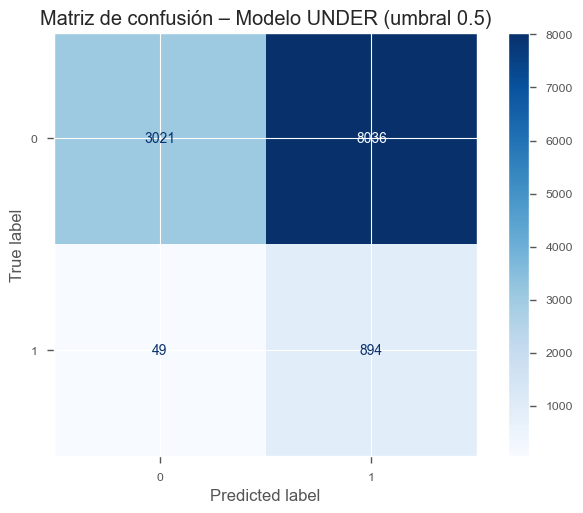

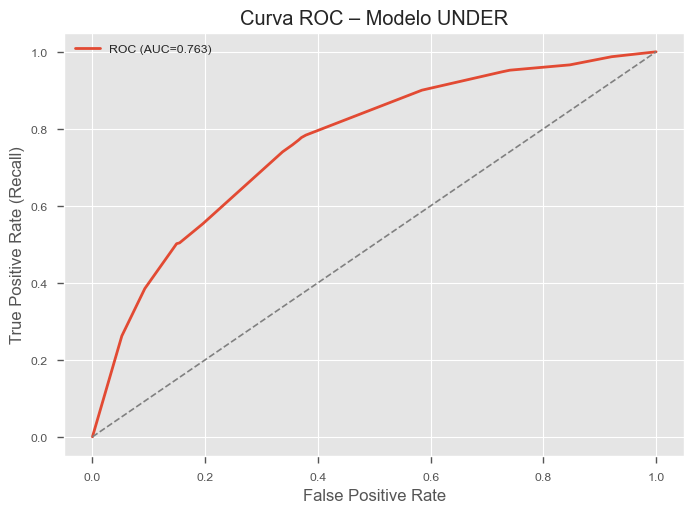

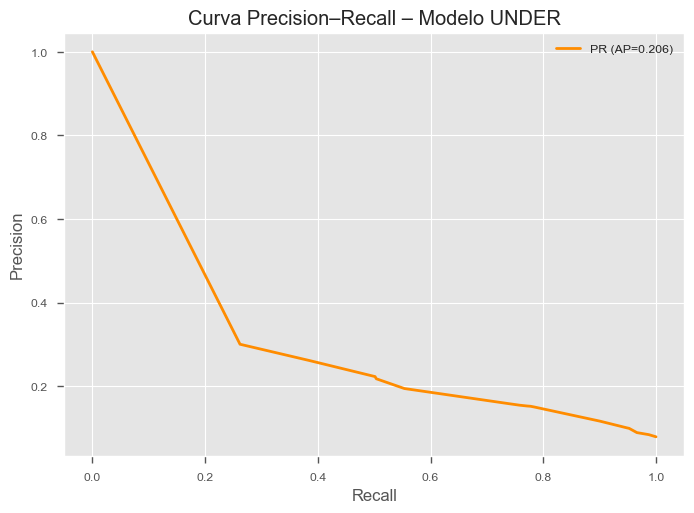

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# === Modelo ganador: best_model_under ===
best_est = best_model_under.best_estimator_

# Probabilidades y predicciones en test
y_proba = best_est.predict_proba(X_test)[:,1]
y_pred  = (y_proba >= 0.5).astype(int)

# === Matriz de confusi√≥n ===
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de confusi√≥n ‚Äì Modelo UNDER (umbral 0.5)")
plt.show()

# === Curva ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})", lw=2)
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC ‚Äì Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()

# === Curva Precision‚ÄìRecall ===
prec, rec, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure()
plt.plot(rec, prec, label=f"PR (AP={ap:.3f})", lw=2, color="darkorange")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision‚ÄìRecall ‚Äì Modelo UNDER")
plt.legend()
plt.grid(True)
plt.show()


# **Modelo XGBOOST CON REGULARIZACION**

## Balanceo UNDER

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Res√∫menes
def resumen(y):
    c = y.value_counts().sort_index()
    p = y.value_counts(normalize=True).sort_index().mul(100).round(2)
    return pd.DataFrame({"count": c, "pct%": p})

print("UNDER aplicado")
print(f"Tama√±o original   : {X_train.shape[0]} filas")
print(f"Tama√±o balanceado : {X_train_under.shape[0]} filas\n")

print("Distribuci√≥n original (conteo y %):")
display(resumen(y_train))

print("Distribuci√≥n balanceada (conteo y %):")
display(resumen(y_train_under))


## XGBoost SIN regularizaci√≥n

In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_base = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=0,                # sin regularizaci√≥n
        eval_metric="auc", random_state=seed
    ))
])

xgb_base.fit(X_train_under, y_train_under)
metrics_xgb_base = evaluar_modelo(xgb_base, X_train_under, y_train_under, X_test, y_test, "XGB ‚Äì Base (sin reg)")

## XGBoost con Ridge (L2: reg_lambda)

In [ ]:
xgb_ridge = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=10, reg_alpha=0,               # Ridge
        eval_metric="auc", random_state=seed
    ))
])

xgb_ridge.fit(X_train_under, y_train_under)
metrics_xgb_ridge = evaluar_modelo(xgb_ridge, X_train_under, y_train_under, X_test, y_test, "XGB ‚Äì Ridge (L2)")


## XGBoost con Lasso (L1: reg_alpha)

In [ ]:
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso
        eval_metric="auc", random_state=seed
    ))
])

xgb_lasso.fit(X_train_under, y_train_under)
metrics_xgb_lasso = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, "XGB ‚Äì Lasso (L1)")



## XGBoost con Elastic Net (L1 + L2)

In [ ]:
xgb_elastic = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=5, reg_alpha=5,                # Elastic Net
        eval_metric="auc", random_state=seed
    ))
])

xgb_elastic.fit(X_train_under, y_train_under)
metrics_xgb_elastic = evaluar_modelo(xgb_elastic, X_train_under, y_train_under, X_test, y_test, "XGB ‚Äì Elastic Net")


## Comparaci√≥n de m√©tricas (Accuracy, Recall, Precision, AUC)

In [ ]:
import pandas as pd

df_xgb = pd.DataFrame([
    {"Modelo": "XGB Base",        **metrics_xgb_base},
    {"Modelo": "XGB Ridge (L2)",  **metrics_xgb_ridge},
    {"Modelo": "XGB Lasso (L1)",  **metrics_xgb_lasso},
    {"Modelo": "XGB Elastic",     **metrics_xgb_elastic},
])
display(df_xgb)


## Curvas ROC comparativas (con AUC)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(6,5))
for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Elastic", xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{nombre} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curvas ROC ‚Äì XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(6,5))

for nombre, modelo in [
    ("XGB Base", xgb_base),
    ("XGB Ridge (L2)", xgb_ridge),
    ("XGB Lasso (L1)", xgb_lasso),
    ("XGB Elastic", xgb_elastic),
]:
    y_proba = modelo.predict_proba(X_test)[:, 1]
    prec, rec, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    plt.plot(rec, prec, lw=2, label=f"{nombre} (AP={ap:.3f})")

# l√≠nea base: proporci√≥n positiva en test
pos_rate = (y_test == 1).mean()
plt.hlines(pos_rate, 0, 1, linestyles='--', colors='gray', label=f"Base rate = {pos_rate:.2f}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curvas Precision‚ÄìRecall ‚Äì XGBoost (Base vs Regularizaciones)")
plt.legend()
plt.grid(True)
plt.xlim(0, 1); plt.ylim(0, 1)
plt.show()


In [ ]:
# Elegir mejores modelos por AUC y por Recall (test)
candidatos = [
    ("XGB Base",    xgb_base,    metrics_xgb_base),
    ("XGB Ridge",   xgb_ridge,   metrics_xgb_ridge),
    ("XGB Lasso",   xgb_lasso,   metrics_xgb_lasso),
    ("XGB Elastic", xgb_elastic, metrics_xgb_elastic),
]

# Mejor por AUC
mejor_auc_nombre, mejor_auc_modelo, mejor_auc_score = max(
    ((n, m, met["roc_auc"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

# Mejor por Recall (test)
mejor_rec_nombre, mejor_rec_modelo, mejor_rec_score = max(
    ((n, m, met["test_recall"]) for n, m, met in candidatos),
    key=lambda t: t[2]
)

print(f">>> Mejor por AUC     : {mejor_auc_nombre}  | AUC={mejor_auc_score:.4f}")
print(f">>> Mejor por Recall  : {mejor_rec_nombre} | Recall={mejor_rec_score:.4f}")

# (Opcional) hiperpar√°metros internos del clasificador ganador en cada criterio
print("\nHiperpar√°metros ‚Äì ganador por AUC:")
print(mejor_auc_modelo.named_steps['clf'].get_params())

print("\nHiperpar√°metros ‚Äì ganador por Recall:")
print(mejor_rec_modelo.named_steps['clf'].get_params())

# (Opcional) dejar variables de salida para usar despu√©s
best_by_auc     = {"nombre": mejor_auc_nombre, "modelo": mejor_auc_modelo, "score": mejor_auc_score}
best_by_recall  = {"nombre": mejor_rec_nombre, "modelo": mejor_rec_modelo, "score": mejor_rec_score}



# C√≥digo completo XGBOOST con Undersampling y Regularizaci√≥n L1, cross_validation y Optimizaci√≥n del umbral.

In [ ]:
# ===============================================
# 1Ô∏è‚É£ BALANCEO DE CLASES (UNDERSAMPLING)
# ===============================================
from imblearn.under_sampling import RandomUnderSampler

# Se iguala la cantidad de clases para evitar sesgo hacia la clase mayoritaria
under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

# Mostrar tama√±os y proporciones
print("UNDER aplicado correctamente ‚úÖ")
print(f"Tama√±o original: {X_train.shape[0]} filas")
print(f"Tama√±o balanceado: {X_train_under.shape[0]} filas\n")

print("Distribuci√≥n original:")
print(y_train.value_counts())
print("\nDistribuci√≥n balanceada:")
print(y_train_under.value_counts())

In [ ]:
# ===============================================
# 2Ô∏è‚É£ MODELO XGBOOST CON REGULARIZACI√ìN LASSO (L1)
# ===============================================
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

# Regularizaci√≥n L1 se controla con reg_alpha > 0
xgb_lasso = Pipeline(steps=[
    ('prep', preprocessing_pipeline),
    ('clf', XGBClassifier(
        n_estimators=300, max_depth=4, learning_rate=0.1,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=0, reg_alpha=10,               # Lasso (L1)
        eval_metric="auc", random_state=seed
    ))
])

print("Modelo XGBoost con regularizaci√≥n L1 configurado ‚úÖ")

In [ ]:
# ===============================================
# 3Ô∏è‚É£ VALIDACI√ìN CRUZADA (STRATIFIED K-FOLD)
# ===============================================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve, roc_auc_score, average_precision_score
import numpy as np

# Se define validaci√≥n cruzada estratificada (mantiene proporciones de clases)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Vector para guardar probabilidades OOF (out-of-fold)
oof_proba = np.zeros(len(y_train_under), dtype=float)

for tr_idx, va_idx in cv.split(X_train_under, y_train_under):
    xtr, xva = X_train_under.iloc[tr_idx], X_train_under.iloc[va_idx]
    ytr, yva = y_train_under.iloc[tr_idx], y_train_under.iloc[va_idx]
    
    xgb_lasso.fit(xtr, ytr)
    oof_proba[va_idx] = xgb_lasso.predict_proba(xva)[:, 1]

# Calcular AUC promedio de la validaci√≥n cruzada
auc_cv = roc_auc_score(y_train_under, oof_proba)
ap_cv  = average_precision_score(y_train_under, oof_proba)

print(f"AUC promedio CV: {auc_cv:.3f}")
print(f"Average Precision (PR-AUC) CV: {ap_cv:.3f}")

In [ ]:
# ===============================================
# 4Ô∏è‚É£ OPTIMIZACI√ìN DEL UMBRAL (THRESHOLD)
# ===============================================
from sklearn.metrics import f1_score

# Calculamos curva Precision-Recall
prec, rec, thr = precision_recall_curve(y_train_under, oof_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
thr_candidates = np.r_[thr, 1.0]  # Alinear longitudes

# Seleccionamos el umbral que maximiza el F1
idx_opt = np.nanargmax(f1)
thr_opt = float(thr_candidates[idx_opt])

print(f"Umbral √≥ptimo seleccionado: {thr_opt:.3f}")
print(f"F1 √≥ptimo: {f1[idx_opt]:.3f} | Precisi√≥n: {prec[idx_opt]:.3f} | Recall: {rec[idx_opt]:.3f}")

In [ ]:
# ===============================================
# 5Ô∏è‚É£ REENTRENAMIENTO Y EVALUACI√ìN FINAL EN TEST
# ===============================================

# Entrenamos el modelo con todos los datos balanceados
xgb_lasso.fit(X_train_under, y_train_under)

# Calculamos probabilidades y predicciones en Test con el umbral √≥ptimo
proba_test = xgb_lasso.predict_proba(X_test)[:, 1]
pred_test  = (proba_test >= thr_opt).astype(int)

# Evaluamos con la funci√≥n definida previamente
metrics_xgb_lasso_opt = evaluar_modelo(xgb_lasso, X_train_under, y_train_under, X_test, y_test, nombre="XGBoost Lasso (L1) ‚Äì Threshold √ìptimo")